In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re

import mglearn
import spacy
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [4]:
fN = '/Users/anaso/Documents/AA/AA-22-23/Trabalho Final/imdbFull.p'

D = pickle.load(open(fN, 'rb'))

corpus = D.data
y = D.target
y = [1 if val>5 else 0 for val in y]

print("Tamanho corpus: {} documentos".format(len(corpus)))
print("Distribuição de classes: ", np.bincount(y))

Tamanho corpus: 50000 documentos
Distribuição de classes:  [25000 25000]


In [ ]:
# Limpeza de dados
corpus = [critica.replace("<br />", " ") for critica in corpus]
corpus = [" ".join((palavra if palavra not in stop_words else " ") for palavra in critica.split()) for critica in corpus]
corpus = [" ".join(lemma.lemmatize(palavra) for palavra in critica.split()) for critica in corpus]

## Term Frequency–Inverse Document Frequency (TFIDF)

- Número máximo de tokens (max_features)

In [5]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=10000))
param_grid = {"logisticregression__C": [0.1, 1, 10, 100], 
                "tfidfvectorizer__max_features": [5000, 7000, 10000, 30000, 90000]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(corpus, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n {}".format(grid.best_params_))

Best cross-validation score: 0.90
Best parameters: 
 {'logisticregression__C': 10, 'tfidfvectorizer__max_features': 90000}


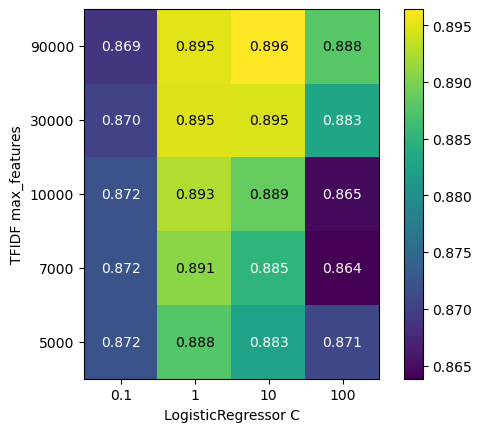

In [6]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 5).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel="LogisticRegressor C", ylabel="TFIDF max_features", cmap="viridis", fmt="%.3f", 
    xticklabels=param_grid["logisticregression__C"], 
    yticklabels=param_grid["tfidfvectorizer__max_features"]
)
plt.colorbar(heatmap)

In [7]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=10000))
param_grid = {"logisticregression__C": [10], 
                "tfidfvectorizer__max_features": [1000, 2000, 3000, 4000, 5000]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(corpus, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n {}".format(grid.best_params_))

Best cross-validation score: 0.88
Best parameters: 
 {'logisticregression__C': 10, 'tfidfvectorizer__max_features': 5000}


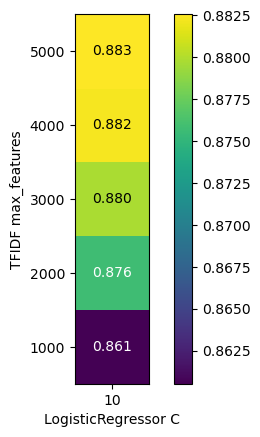

In [8]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 5).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel="LogisticRegressor C", ylabel="TFIDF max_features", cmap="viridis", fmt="%.3f", 
    xticklabels=param_grid["logisticregression__C"], 
    yticklabels=param_grid["tfidfvectorizer__max_features"]
)
plt.colorbar(heatmap)

In [9]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=10000))
param_grid = {"logisticregression__C": [10], 
                "tfidfvectorizer__max_features": [100, 300, 500, 700, 1000, 5000]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(corpus, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n {}".format(grid.best_params_))

Best cross-validation score: 0.88
Best parameters: 
 {'logisticregression__C': 10, 'tfidfvectorizer__max_features': 5000}


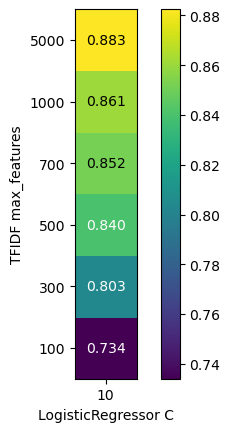

In [10]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 6).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel="LogisticRegressor C", ylabel="TFIDF max_features", cmap="viridis", fmt="%.3f", 
    xticklabels=param_grid["logisticregression__C"], 
    yticklabels=param_grid["tfidfvectorizer__max_features"]
)
plt.colorbar(heatmap)

<b>NOTAS: </b>
- Podemos observar, pelos gráficos anteriores, que abaixo de 100 features a precisão do classificador do discriminante logístico diminui consideravelmente. 

- Document Frequency (Minimo e Máximo)

In [11]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=10000))
param_grid = {"logisticregression__C": [10], 
                "tfidfvectorizer__min_df": [1, 5, 10, 15], 
                "tfidfvectorizer__max_df": [0.95, 0.9, 0.85, 0.8, 0.7, 0.6]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(corpus, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n {}".format(grid.best_params_))

Best cross-validation score: 0.90
Best parameters: 
 {'logisticregression__C': 10, 'tfidfvectorizer__max_df': 0.6, 'tfidfvectorizer__min_df': 1}


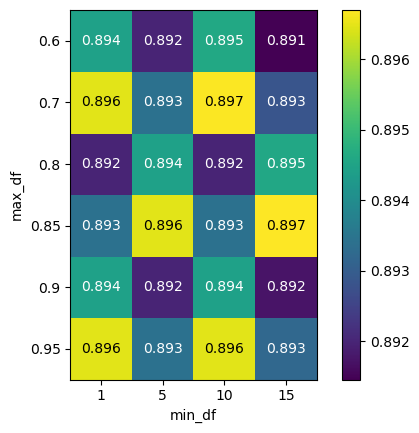

In [12]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 6).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel="min_df", ylabel="max_df", cmap="viridis", fmt="%.3f", 
    xticklabels=param_grid["tfidfvectorizer__min_df"], 
    yticklabels=param_grid["tfidfvectorizer__max_df"]
)
plt.colorbar(heatmap)

In [6]:
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=10000))
param_grid = {"logisticregression__C": [10], 
               "tfidfvectorizer__min_df": [1, 2, 3, 4, 5], 
                "tfidfvectorizer__max_df": [0.95, 0.9, 0.85, 0.8]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(corpus, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: \n {}".format(grid.best_params_))

Best cross-validation score: 0.90
Best parameters: 
 {'logisticregression__C': 10, 'tfidfvectorizer__max_df': 0.9, 'tfidfvectorizer__min_df': 1}


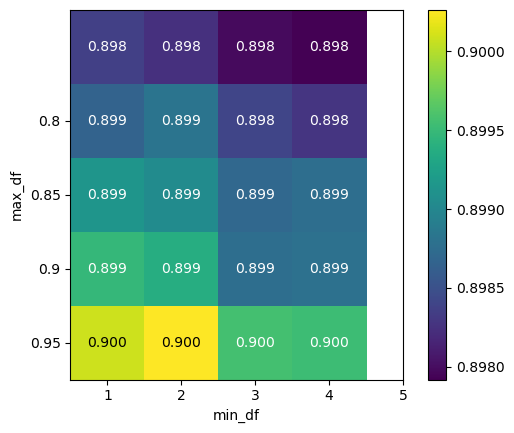

In [7]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 5).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel="min_df", ylabel="max_df", cmap="viridis", fmt="%.3f", 
    xticklabels=param_grid["tfidfvectorizer__min_df"], 
    yticklabels=param_grid["tfidfvectorizer__max_df"]
)
plt.colorbar(heatmap)

In [ ]:
tf = grid.best_estimator_['tfidfvectorizer']
print("Tamanho do dicionário: {}".format(len(tf.get_feature_names_out())))



Tamanho do dicionário: 99896


AttributeError: 'GridSearchCV' object has no attribute 'feature_names_in_'

- Token Pattern

Avaliar: 
- r'(\S+)'
- r'\b[a-zA-Z]{3,}\b'
- r'\b\w{3,}\b'

- N-Gram

<b>TODO</b>
- Grid Search para n_gram
- Grid Search para token_pattern
- Grid Search para min_dt e max_df


In [ ]:
# param_grid = {''}